# Seed-based FC - Rest


**Resources**

[Nilearn 9.4.6. Producing single subject maps of seed-to-voxel correlation](https://nilearn.github.io/auto_examples/03_connectivity/plot_seed_to_voxel_correlation.html#sphx-glr-auto-examples-03-connectivity-plot-seed-to-voxel-correlation-py)

[Nilearn: 9.5.4. Default Mode Network extraction of AHDH dataset](https://nilearn.github.io/auto_examples/04_glm_first_level/plot_adhd_dmn.html)

:::{note}
HC coordinates from Sherman (2015): <br>
'Analyses focused on a priori defined region of the anterior hippocampus (MNI coordinates: x = -21, y = -9, z = -15) because of its importance to retrieval of relational memory (Giovanello et al., 2009) and sensitivity to prior sleep physiology (Mander et al., 2013a).'
:::

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import warnings
warnings.filterwarnings('ignore')

from nilearn import plotting, image, input_data
from nilearn.glm.first_level import make_first_level_design_matrix, FirstLevelModel
from nilearn.plotting import plot_design_matrix, plot_contrast_matrix

tr = 1.5  
n_scans = 240
frame_times = np.arange(n_scans) * tr  
hc_coords = [(-21, -9, -15)]

In [4]:
func_files = sorted(glob.glob('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-*/func/sub-*_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz'))
func_files[:5]
print(len(func_files))

106


In [59]:
conf_files = sorted(glob.glob('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-*/func/sub-*_task-REST_run-01_desc-confounds_regressors_fmr.tsv'))
conf_files[:5]
print(len(conf_files))

106


In [6]:
subjects = np.unique([ func_file.split('sub-')[1][:5] for func_file in func_files])
np.savetxt('/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/subjects_rest.txt', subjects, fmt = '%s')
subjects[:5]

array(['30004', '30008', '30009', '30012', '30015'], dtype='<U5')

## First level GLM

In [7]:
hrf_model = 'spm + derivative'
selected_confounds = ['a_comp_cor_00', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z', 'motion_outlier_00']

# Seed masker

In [17]:
seed_masker = input_data.NiftiSpheresMasker(
    hc_coords, radius=8,
    mask_img='/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/tpl-MNI152NLin2009cAsym_space-MNI_res-02_brainmask.nii',
    detrend=True, 
    standardize=True,
    low_pass=0.08, high_pass=0.008, 
    t_r=tr, verbose=1)

brain_masker = input_data.NiftiMasker(
    mask_img='/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/tpl-MNI152NLin2009cAsym_space-MNI_res-02_brainmask.nii',
    smoothing_fwhm=6,
    detrend=True, 
    standardize=True,
    low_pass=0.08, high_pass=0.008, 
    t_r=tr, verbose=1)


In [18]:
for i, subject in enumerate(subjects):
    
    print(i, subject)

0 30004
1 30008
2 30009
3 30012
4 30015
5 30019
6 30020
7 30023
8 30040
9 30057
10 30064
11 30066
12 30069
13 30074
14 30085
15 30088
16 30090
17 30091
18 30095
19 30096
20 30105
21 30116
22 30118
23 30119
24 30128
25 30181
26 30217
27 30227
28 30236
29 30242
30 30255
31 30274
32 30283
33 30295
34 30330
35 30346
36 30376
37 30395
38 30400
39 30403
40 30412
41 30426
42 30432
43 30466
44 30469
45 30476
46 30478
47 30568
48 30570
49 30581
50 30584
51 30588
52 40160
53 40170
54 40175
55 40288
56 40351
57 40490
58 40496
59 40500
60 40512
61 40515
62 40516
63 40519
64 40520
65 40522
66 40524
67 40547
68 40550
69 40564
70 40601
71 40608
72 40615
73 40619
74 40623
75 40624
76 40629
77 40638
78 40649
79 40650
80 40655
81 40656
82 40658
83 40664
84 40665
85 40668
86 40672
87 40685
88 40694
89 40720
90 40728
91 40730
92 40738
93 40743
94 40750
95 40758
96 40767
97 40768
98 40769
99 40773
100 40777
101 40778
102 40779
103 40784
104 40796
105 40803


# Pipeline

In [15]:
subjects = np.genfromtxt('/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/subjects_rest.txt', dtype='str')

selected_confounds = ['a_comp_cor_00', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z', 'motion_outlier_00']
dsn = pd.DataFrame(frame_times, columns = ['frame_times'])

outDir = '/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/rest/'

start time: 
2022-01-15 08:37:44.340888
image file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
confounds file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-REST_run-01_desc-confounds_regressors_fmr.tsv
extract time series from brain
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivat

[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30020/func/sub-30020_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-30020/func/sub-30020_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.864; max = 1.568



0:02:02.312746
start time: 
2022-01-15 08:51:40.72

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30069/func/sub-30069_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-30069/func/sub-30069_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.652; max = 1.298



0:02:02.881681
start time: 
2022-01-15 09:03:34.535907
image file: /Volumes/psybrain

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30095/func/sub-30095_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-30095/func/sub-30095_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.618; max = 1.135



0:01:54.121392
start time: 
2022-01-15 09:15:01.270632
image file: /Volumes/psybrain

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30128/func/sub-30128_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-30128/func/sub-30128_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.798; max = 1.421



0:01:53.702946
start time: 
2022-01-15 09:26:24.767186
image file: /Volumes/psybrain

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30255/func/sub-30255_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-30255/func/sub-30255_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.540; max = 1.315



0:01:54.108517
start time: 
2022-01-15 09:37:49.596083
image file: /Volumes/psybrain

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30376/func/sub-30376_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-30376/func/sub-30376_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.903; max = 1.565



0:01:54.654891
start time: 
2022-01-15 09:49:16.093269
image file: /Volumes/psybrain

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30432/func/sub-30432_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-30432/func/sub-30432_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.707; max = 1.326



0:01:55.736941
start time: 
2022-01-15 10:00:44.296800
image file: /Volumes/psybrain

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30570/func/sub-30570_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-30570/func/sub-30570_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.725; max = 1.385



0:01:55.261972
start time: 
2022-01-15 10:12:22.076497
image file: /Volumes/psybrain

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40175/func/sub-40175_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40175/func/sub-40175_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.698; max = 0.885



0:01:55.014963
start time: 
2022-01-15 10:23:51.095387
image file: /Volumes/psybrain

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40512/func/sub-40512_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40512/func/sub-40512_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.514; max = 0.877



0:01:54.835177
start time: 
2022-01-15 10:35:22.737586
image file: /Volumes/psybrain

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40524/func/sub-40524_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40524/func/sub-40524_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.919; max = 1.180



0:01:57.555250
start time: 
2022-01-15 10:46:59.055903
image file: /Volumes/psybrain

[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40615/func/sub-40615_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.867; max = 1.194



0:01:54.776407
start time: 
2022-01-15 10:56:47.584024
image file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40619/func/sub-40619_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
confounds file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40619/func/sub-40619_task-REST_run-01_desc-confounds_regressors_fmr.tsv
extract time series from brain
[NiftiMasker.fit] Loading d

[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
extract time series from hc roi
[NiftiSpheresMasker.transform_single_imgs] Loading data from /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40649/func/sub-40649_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.739; max = 1.405



0:01:56.007301
start time: 
2022-01-15 11:08:29.406654
image file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40650/func/sub-40650_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
confounds file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40650/func/sub-40650_task-REST_run-01_desc-confounds_regressors_fmr.tsv
extract time series from brain
[NiftiMasker.fit] Loading d

[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.764; max = 1.107



0:01:55.256451
start time: 
2022-01-15 11:18:14.958156
image file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40668/func/sub-40668_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
confounds file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40668/func/sub-40668_task-REST_run-01_desc-confounds_regressors_fmr.tsv
extract time series from brain
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40668/func/sub-40668_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing i

[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.616; max = 1.003



0:01:55.839855
start time: 
2022-01-15 11:29:50.952836
image file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40730/func/sub-40730_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
confounds file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40730/func/sub-40730_task-REST_run-01_desc-confounds_regressors_fmr.tsv
extract time series from brain
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40730/func/sub-40730_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing i

[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.713; max = 1.027



0:01:55.796960
start time: 
2022-01-15 11:41:26.064810
image file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40768/func/sub-40768_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
confounds file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40768/func/sub-40768_task-REST_run-01_desc-confounds_regressors_fmr.tsv
extract time series from brain
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40768/func/sub-40768_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing i

[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Cleaning extracted signals
starting correlations
Seed-to-voxel correlation Fisher-z transformed: min = -0.643; max = 1.123



0:03:38.098365
start time: 
2022-01-15 12:31:11.235386
image file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40784/func/sub-40784_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz
confounds file: /Volumes/psybrain/ADM/derivatives/fmriprep/sub-40784/func/sub-40784_task-REST_run-01_desc-confounds_regressors_fmr.tsv
extract time series from brain
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40784/func/sub-40784_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz')
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing i

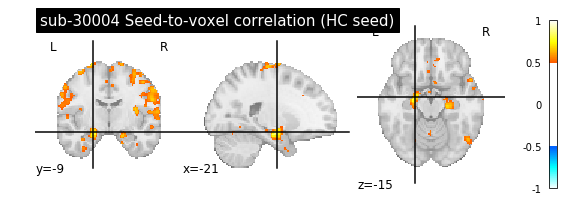

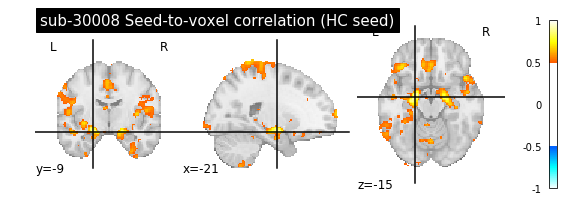

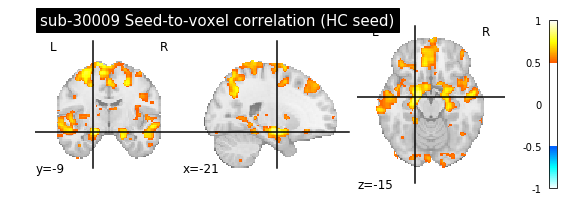

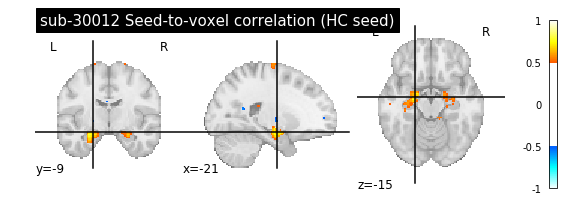

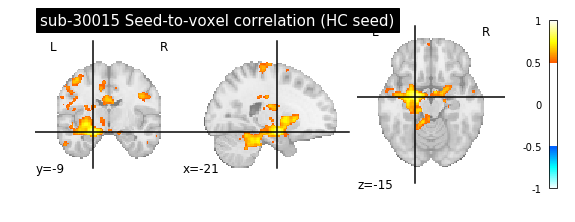

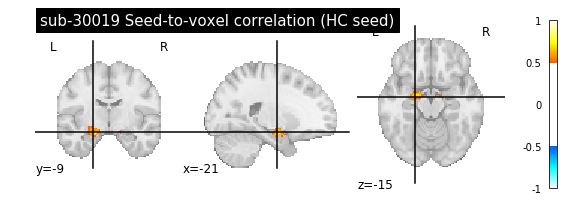

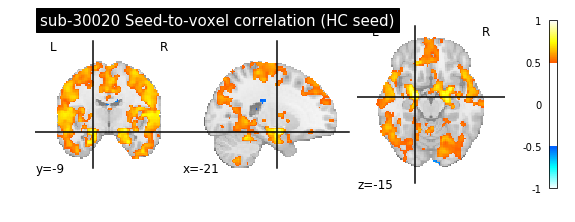

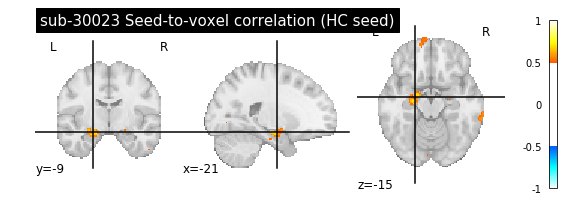

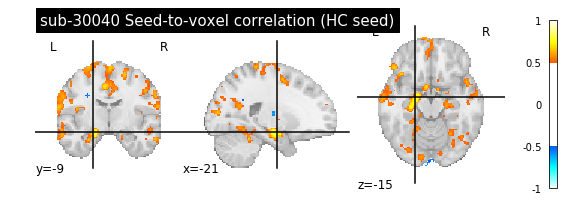

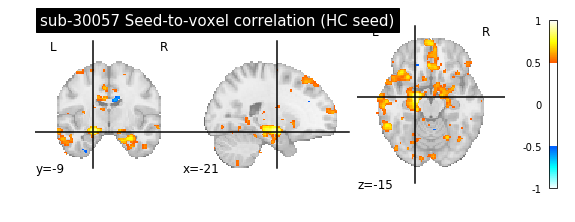

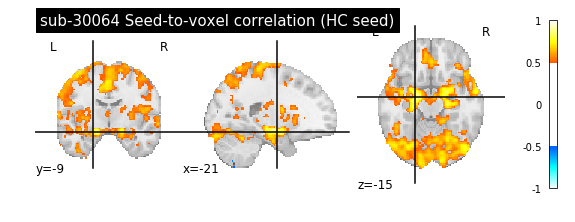

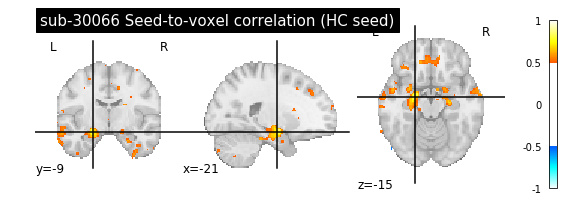

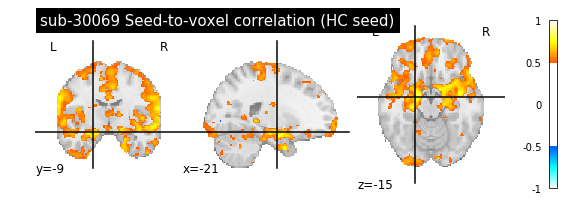

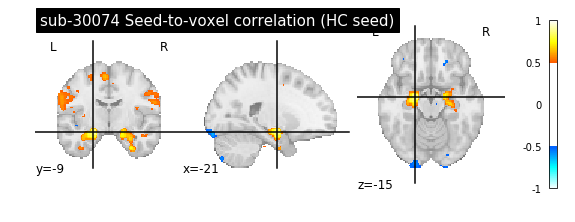

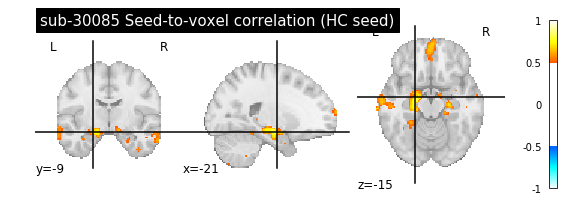

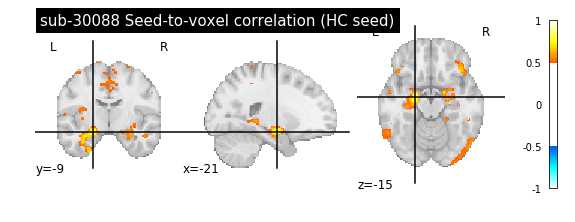

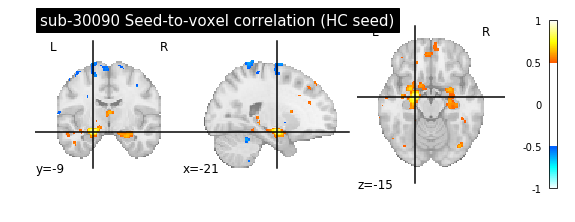

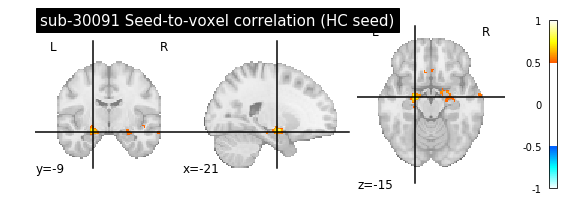

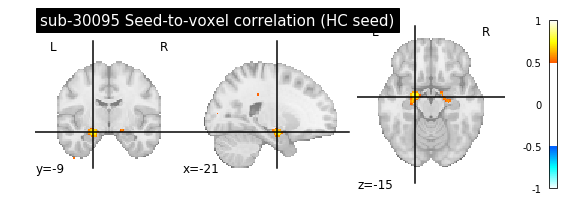

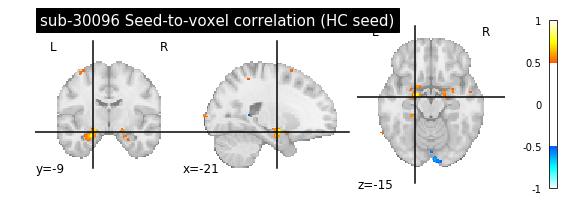

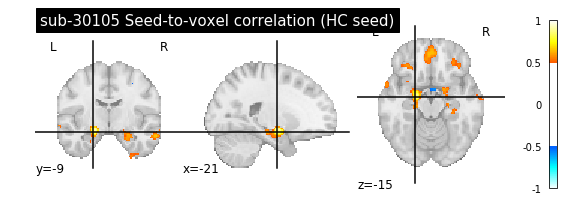

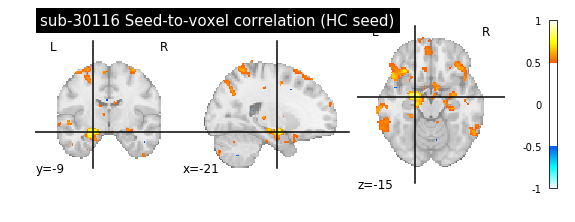

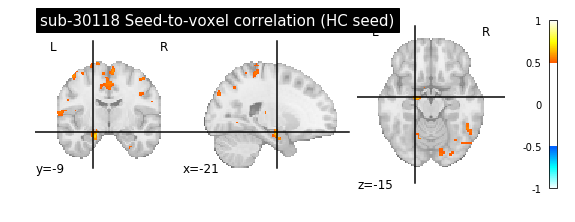

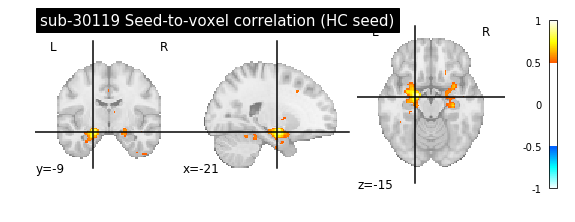

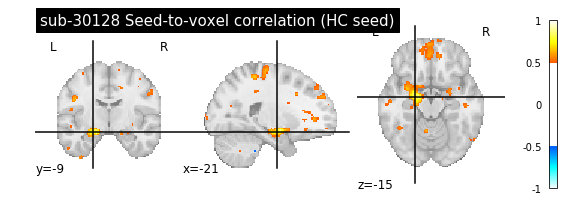

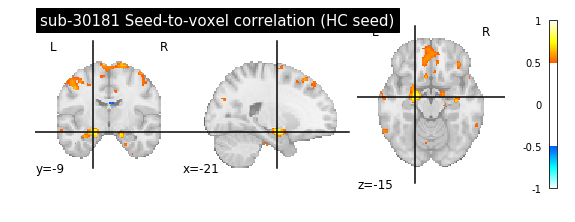

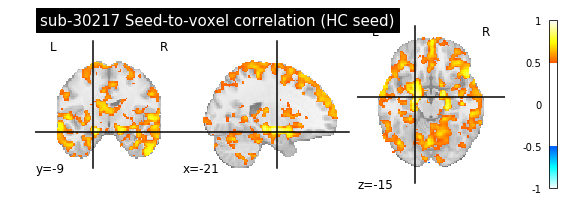

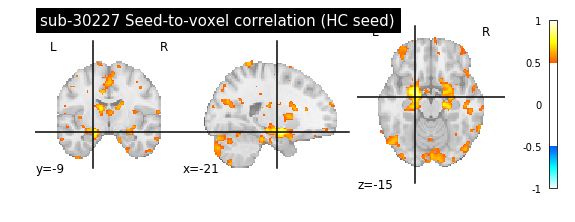

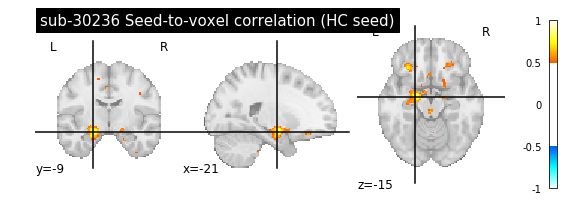

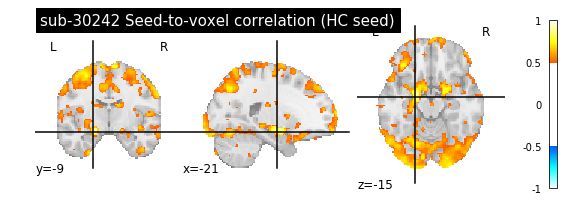

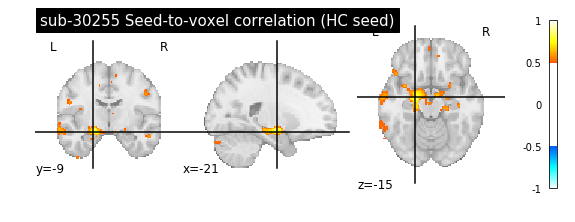

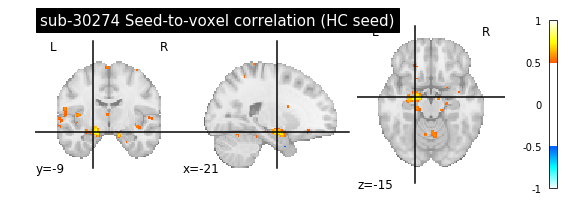

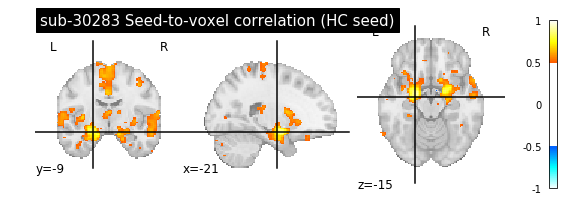

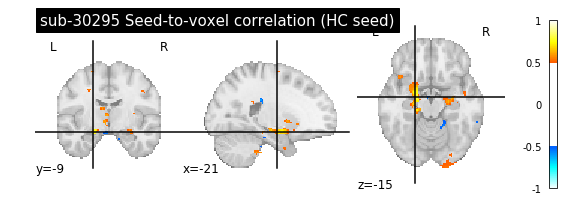

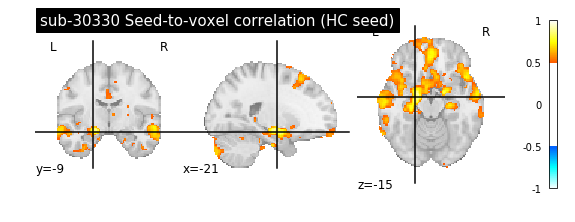

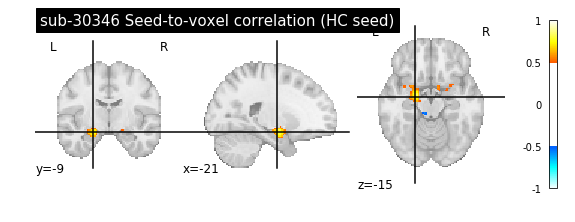

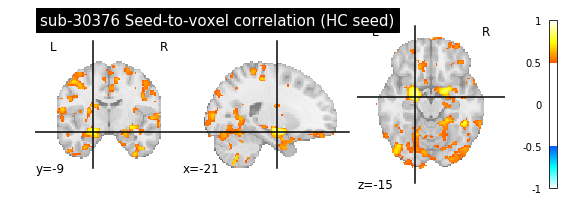

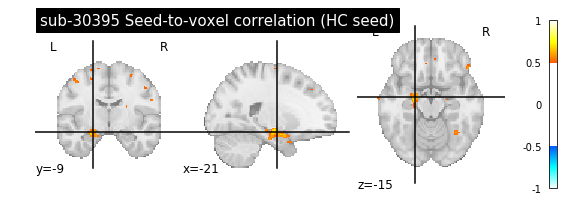

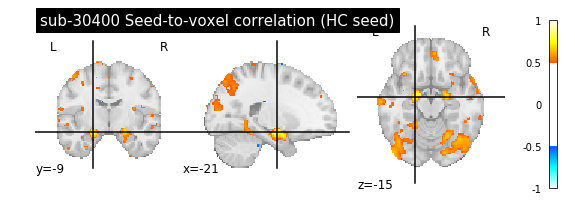

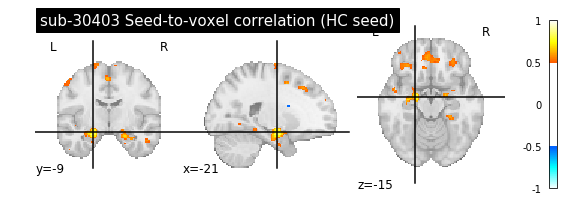

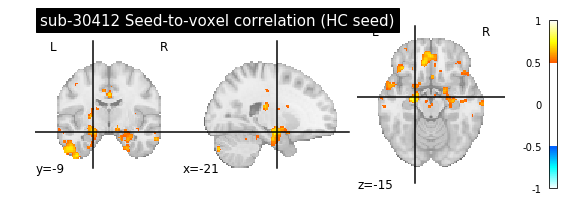

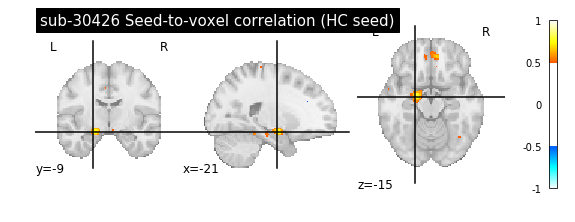

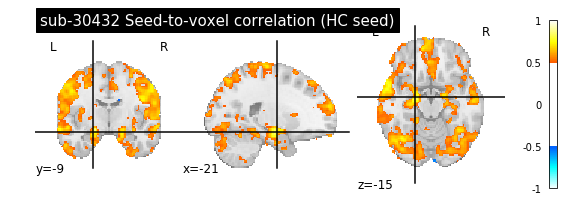

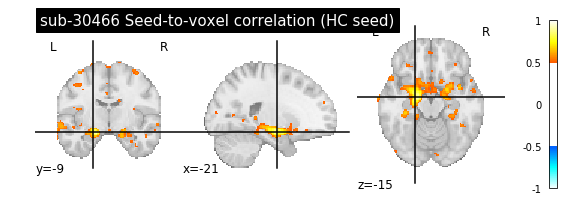

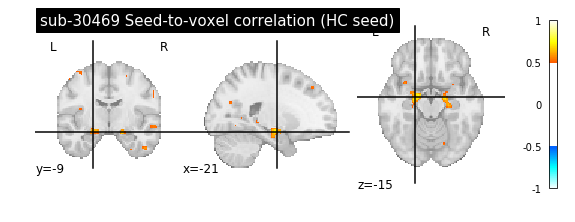

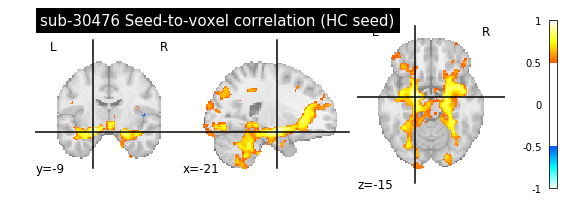

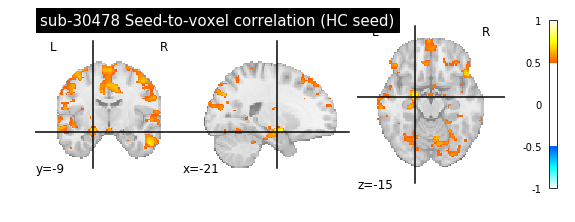

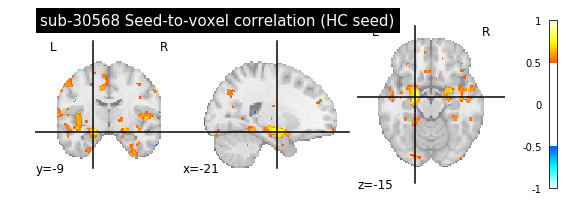

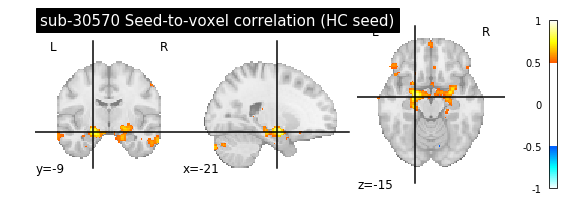

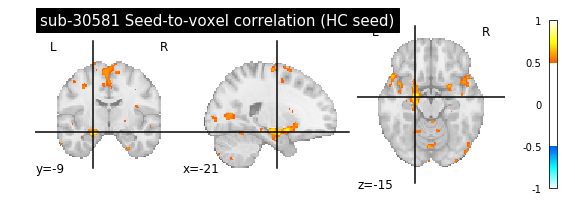

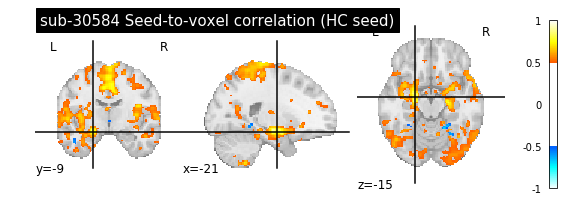

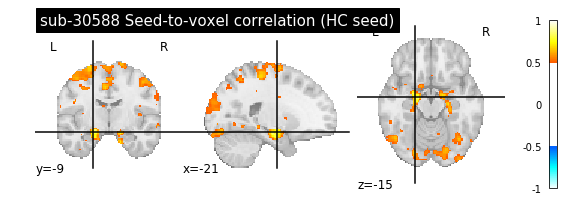

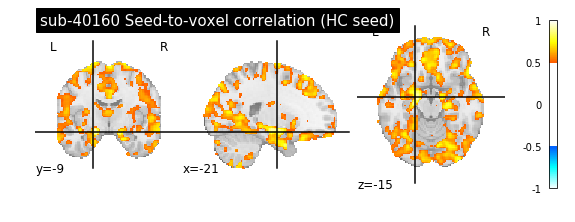

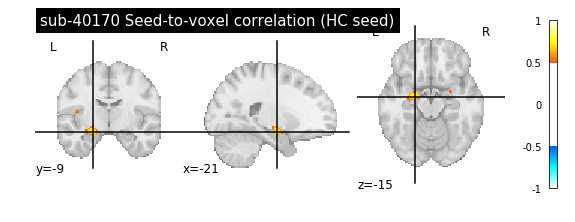

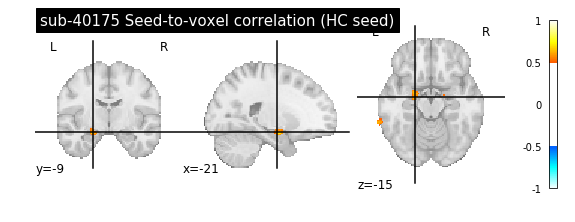

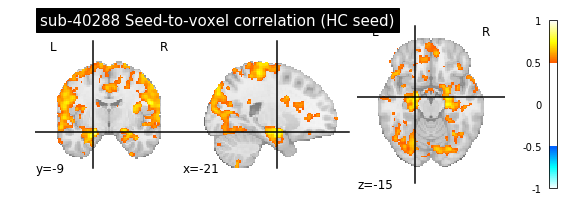

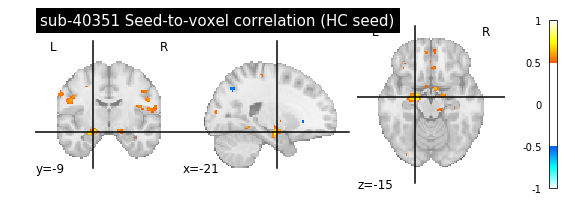

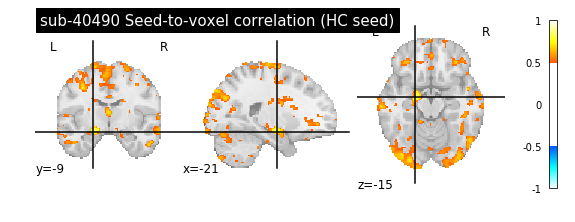

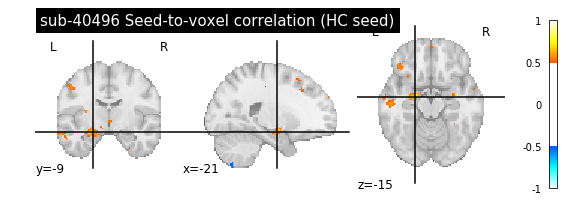

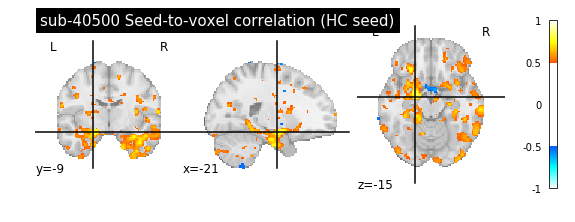

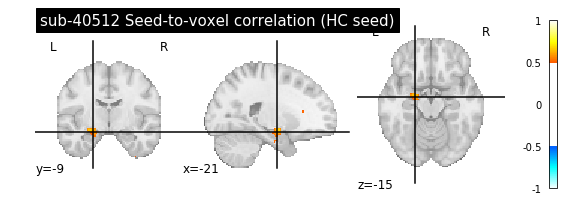

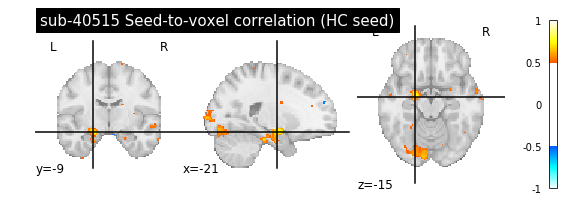

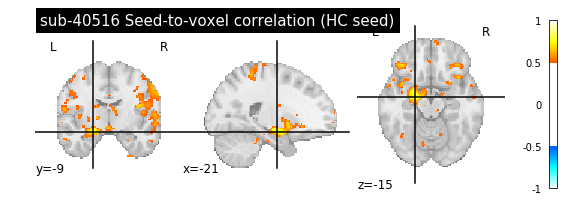

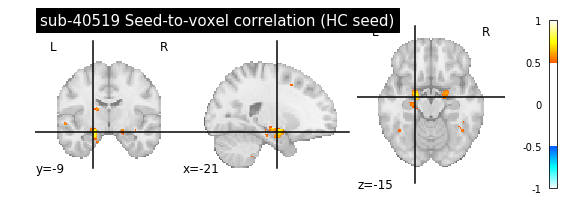

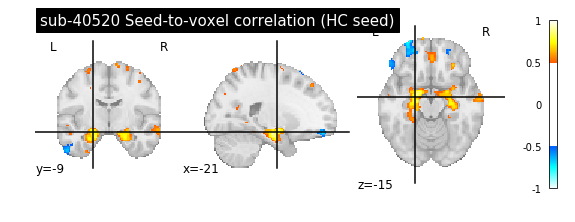

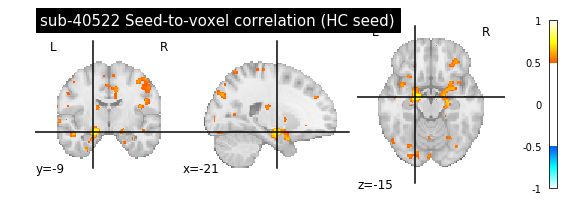

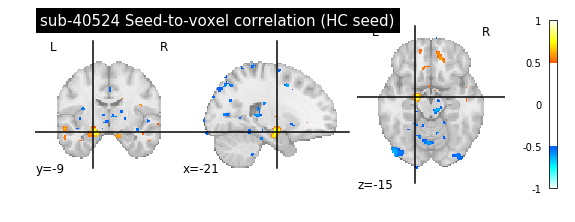

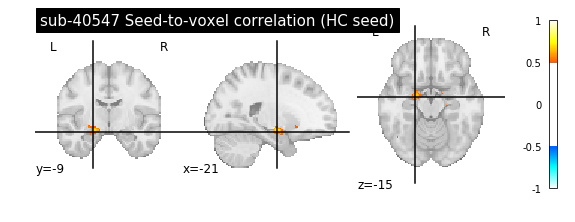

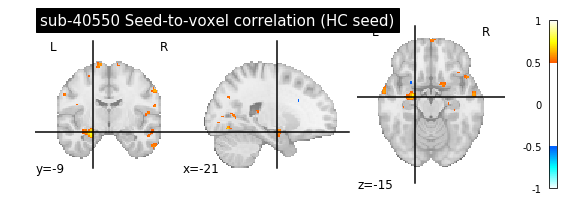

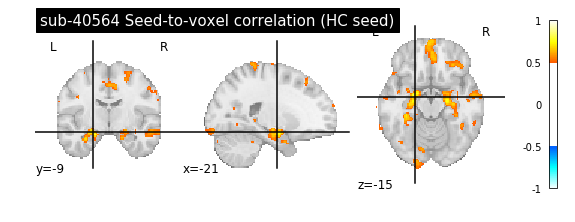

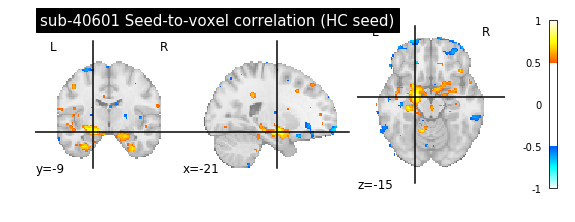

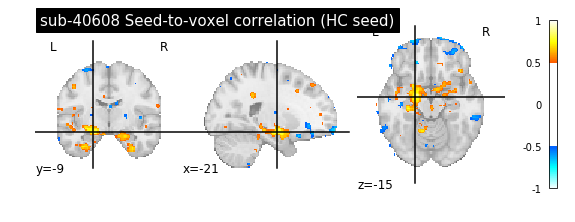

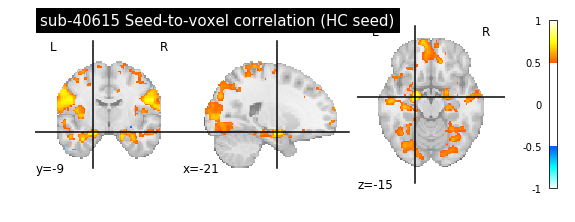

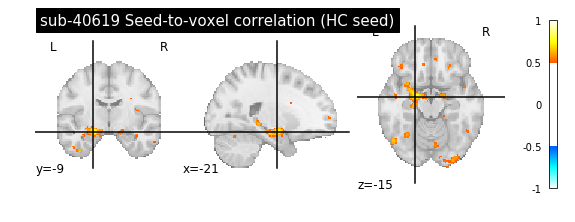

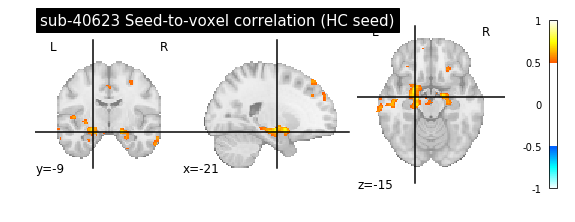

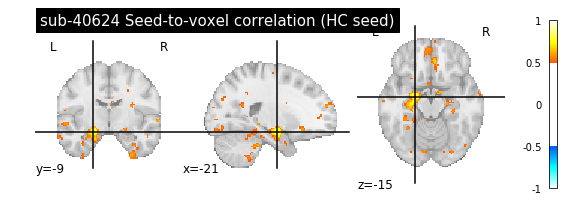

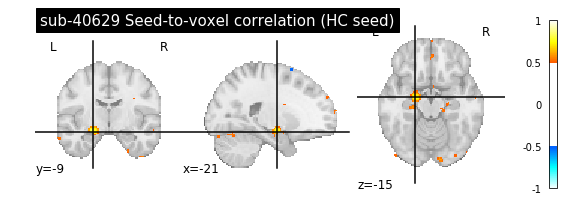

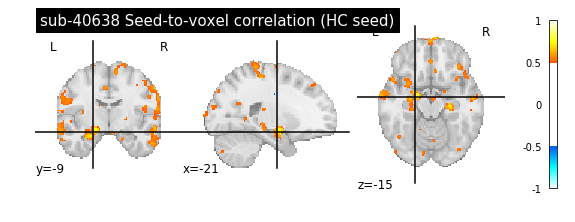

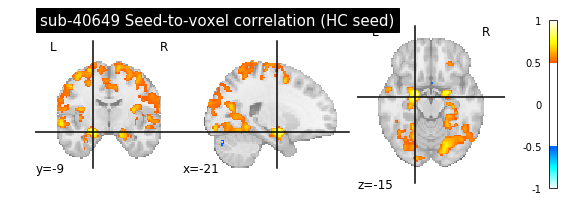

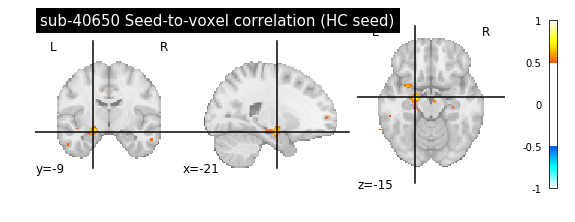

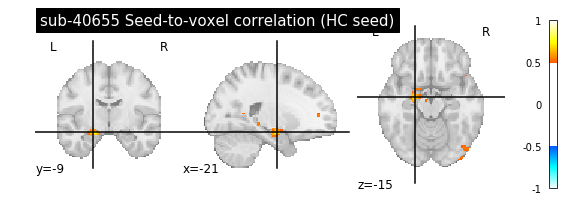

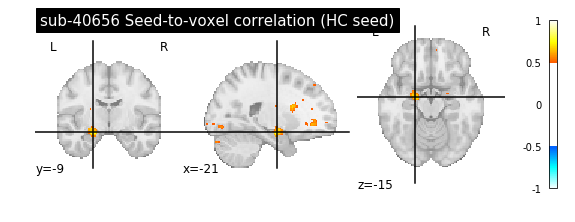

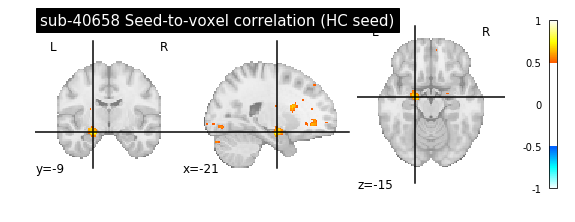

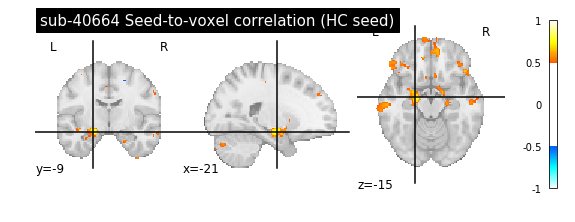

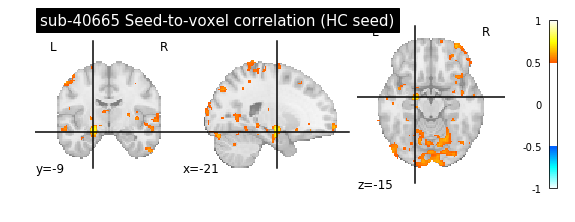

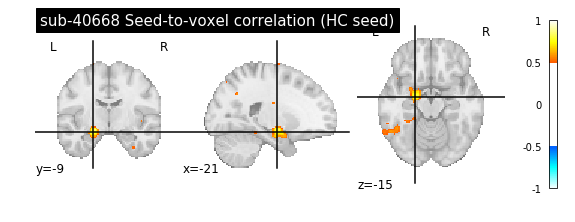

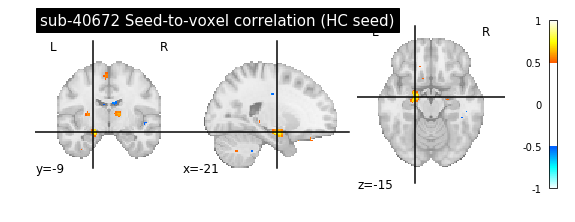

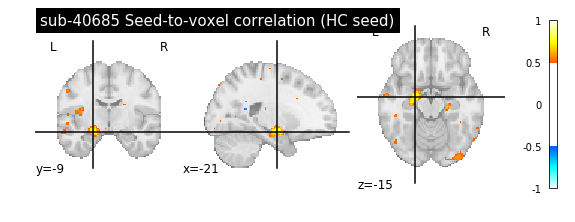

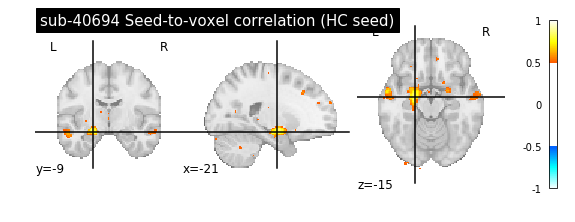

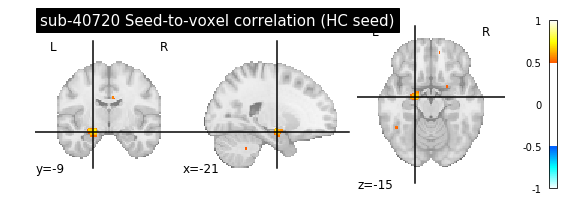

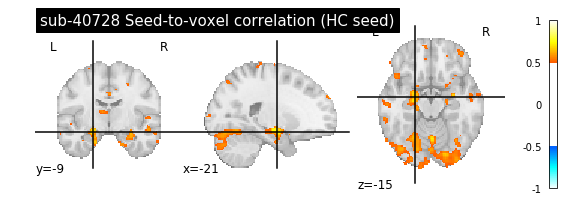

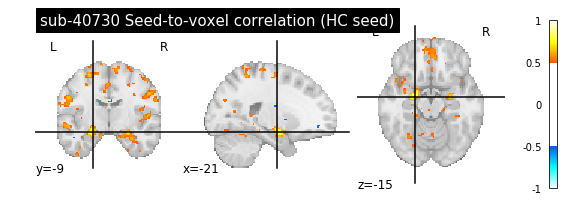

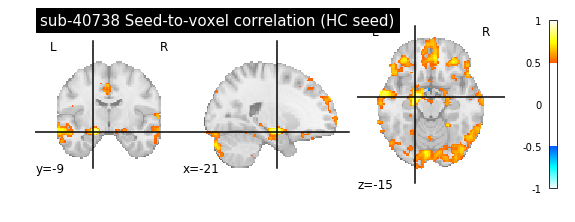

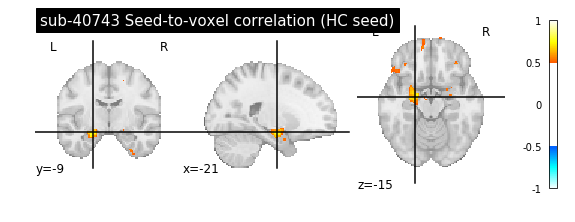

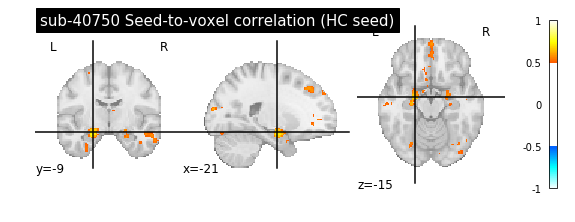

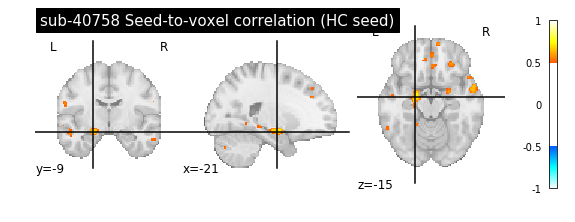

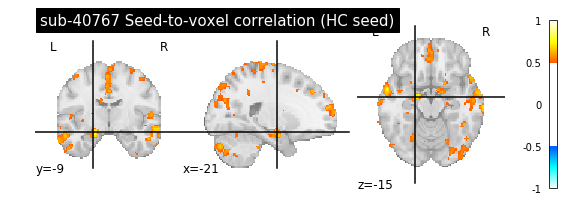

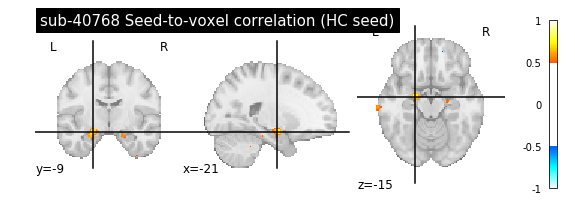

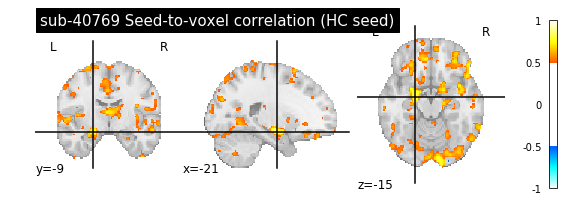

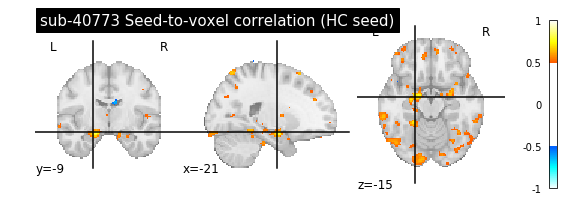

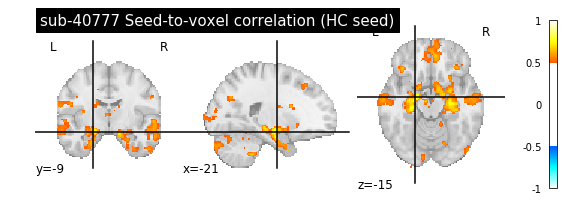

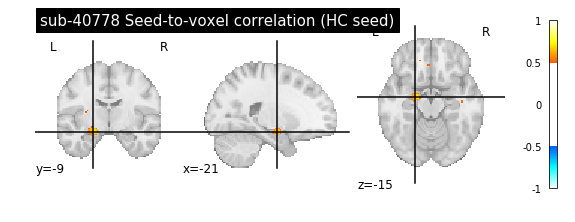

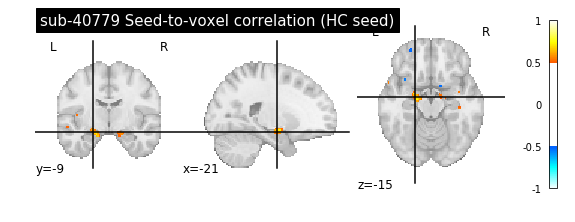

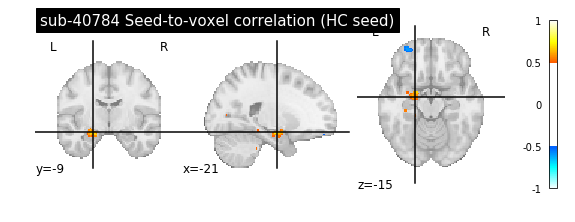

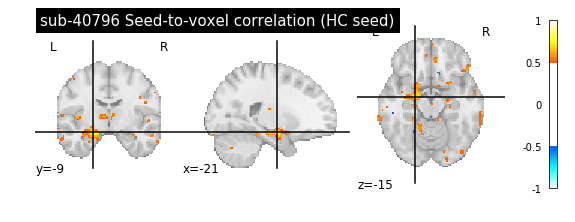

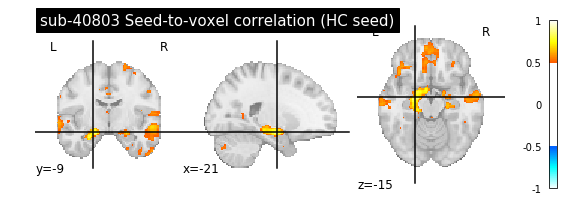

In [56]:
import datetime

for subject in sorted(subjects):
    
    if not os.path.exists(outDir + 'sub-%s_task-MemMatch_seed-based-hc_correlation_rest_z.nii.gz' % (subject)):
    
        begin_time = datetime.datetime.now()
        print('start time: ')
        print(begin_time)

        try:

            img_file = '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-%s/func/sub-%s_task-REST_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold_brain.nii.gz' % (subject, subject)
            conf_file = '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-%s/func/sub-%s_task-REST_run-01_desc-confounds_regressors_fmr.tsv' % (subject, subject)
    
            print('image file: %s' % img_file)
            print('confounds file: %s' % conf_file)
            
            confounds = pd.read_csv(conf_file, sep='\t')
            confounds['motion_outlier_00'] = np.where(confounds['framewise_displacement'] > 0.20, 1, 0)
            confounds = confounds[selected_confounds]

            print('extract time series from brain')
            brain_time_series = brain_masker.fit_transform(img_file, confounds=confounds)

            print('extract time series from hc roi')
            seed_time_series = seed_masker.fit_transform(img_file, confounds=confounds)

        except Exception as e:
            print(e)

        try:

            print('starting correlations')
            seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                                  seed_time_series.shape[0])

            seed_to_voxel_correlations_img = brain_masker.inverse_transform(seed_to_voxel_correlations.T)

            seed_to_voxel_correlations_img.to_filename(
                outDir + 'sub-%s_task-MemMatch_seed-based-hc_correlation_rest.nii.gz' %
            (subject))

            display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                             threshold=0.5, vmax=1,
                                             cut_coords=hc_coords[0],
                                             title="sub-%s Seed-to-voxel correlation (HC seed)" % subject
                                             )

            #plt.show()
            display.savefig(outDir + 'sub-%s_task-MemMatch_seed-based-hc_correlation_rest.png' %
                           (subject))


            seed_to_voxel_correlations_fisher_z = np.arctanh(seed_to_voxel_correlations)
            print("Seed-to-voxel correlation Fisher-z transformed: min = %.3f; max = %.3f"
                  % (seed_to_voxel_correlations_fisher_z.min(),
                     seed_to_voxel_correlations_fisher_z.max()
                     )
                  )

            # Finally, we can transform the correlation array back to a Nifti image
            # object, that we can save.
            seed_to_voxel_correlations_fisher_z_img = brain_masker.inverse_transform(
                seed_to_voxel_correlations_fisher_z.T)

            seed_to_voxel_correlations_fisher_z_img.to_filename(
                outDir + 'sub-%s_task-MemMatch_seed-based-hc_correlation_rest_z.nii.gz' % (subject))

            print('\n\n')

        except Exception as e:
            print(e)

    print(datetime.datetime.now() - begin_time)

## Motion QC

In [61]:
drop_subs = []
fd_stats = pd.DataFrame()
tr_perc = .2

for file in sorted(conf_files):
    
    subject = file.split('sub-')[1][:5]
    run = file.split('REST')[1][0:1]
    
    try:
    
        conf_ = pd.read_csv(file, sep='\t')
        
        fd_mean = conf_['framewise_displacement'].mean()
        fd_perc = (conf_['framewise_displacement'] > 0.20).sum() / len(conf_['framewise_displacement'])
        fd_stats = fd_stats.append({'subject': subject,
                                    'run': run,
                                    'fd_mean': fd_mean,
                                   'fd_perc': fd_perc}, ignore_index=True)
        
        if ((fd_mean > 0.50) or (fd_perc > tr_perc)):
            drop_subs.append([subject, run, 'fd_mean= %.2f' % fd_mean, 'fd_perc = %.2f' % fd_perc])
            
    except Exception as e:
        print(subject, e)
        drop_subs.append([subject, run, e])
    

In [62]:
drop_subs_ = [x[0] for x in drop_subs]
drop_subs_

['30040',
 '30116',
 '30181',
 '30242',
 '30376',
 '30403',
 '40175',
 '40490',
 '40500',
 '40516',
 '40601',
 '40608',
 '40623',
 '40629',
 '40658',
 '40665',
 '40728',
 '40730',
 '40768',
 '40779',
 '40784',
 '40796']

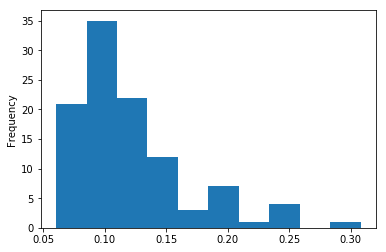

In [63]:
fd_stats['fd_mean'].plot(kind='hist')
plt.savefig('/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/fd_mean_hist.png', dpi=300)

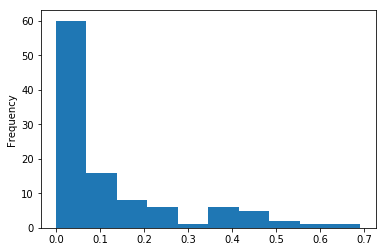

In [64]:
fd_stats['fd_perc'].plot(kind='hist')
plt.savefig('/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/fd_perc_hist.png', dpi=300)

In [76]:
cor_files = glob.glob('/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/rest/sub-*_task-MemMatch_seed-based-hc_correlation_rest_z.nii.gz')
print(len(cor_files))

cor_files = [file for file in cor_files if file.split('sub-')[1][:5] not in drop_subs_]
print(len(cor_files))
ya_files = [file for file in cor_files if 'sub-3' in file]
print('ya ', len(ya_files))
oa_files = [file for file in cor_files if 'sub-4' in file]
print('oa ', len(oa_files))

# dsn_mat2 = pd.DataFrame([1] * len(cor_files), columns = ['intercept'])
dsn_mat2 = pd.DataFrame([-1] * len(ya_files) + [1] * len(oa_files), columns=['age group'])

106
84
ya  46
oa  38


In [77]:
ya_files[:2]

['/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/rest/sub-30469_task-MemMatch_seed-based-hc_correlation_rest_z.nii.gz',
 '/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/rest/sub-30105_task-MemMatch_seed-based-hc_correlation_rest_z.nii.gz']

In [78]:
oa_files[:2]

['/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/rest/sub-40803_task-MemMatch_seed-based-hc_correlation_rest_z.nii.gz',
 '/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/rest/sub-40638_task-MemMatch_seed-based-hc_correlation_rest_z.nii.gz']

In [79]:
from nilearn.glm.second_level import SecondLevelModel

second_level_model = SecondLevelModel(smoothing_fwhm=8.0).fit(
    cor_files, design_matrix=dsn_mat2)


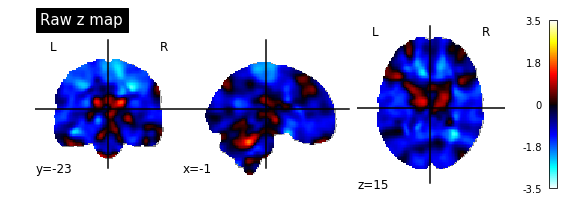

In [80]:
z_map = second_level_model.compute_contrast(second_level_contrast=[1], output_type='z_score')

from nilearn import plotting
display = plotting.plot_stat_map(z_map, title='Raw z map')

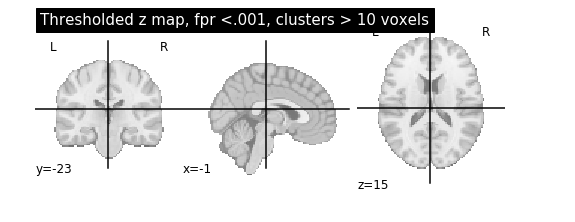

In [81]:
from nilearn.glm import threshold_stats_img
thresholded_map1, threshold1 = threshold_stats_img(
    z_map,
    alpha=.001,
    height_control='fpr',
    cluster_threshold=10,
    two_sided=True,
)
plotting.plot_stat_map(
    thresholded_map1, cut_coords=display.cut_coords, threshold=threshold1,
    title='Thresholded z map, fpr <.001, clusters > 10 voxels')

The FDR=.05 threshold is inf


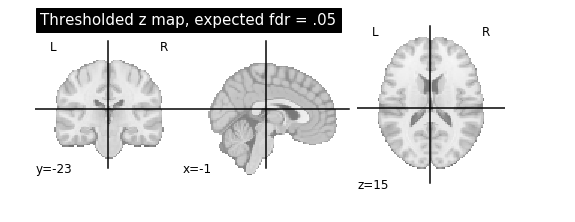

In [82]:
thresholded_map2, threshold2 = threshold_stats_img(
    z_map, alpha=.05, height_control='fdr')
print('The FDR=.05 threshold is %.3g' % threshold2)


plotting.plot_stat_map(thresholded_map2, cut_coords=display.cut_coords,
                       title='Thresholded z map, expected fdr = .05',
                       threshold=threshold2)

The p<.05 Bonferroni-corrected threshold is 5.19


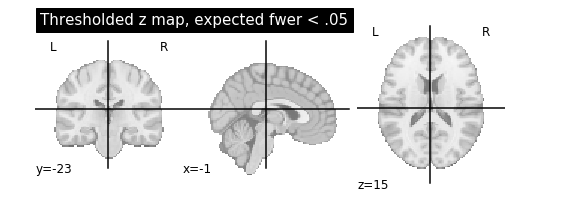

In [83]:
thresholded_map3, threshold3 = threshold_stats_img(
    z_map, alpha=.05, height_control='bonferroni')
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold3)

plotting.plot_stat_map(thresholded_map3, cut_coords=display.cut_coords,
                       title='Thresholded z map, expected fwer < .05',
                       threshold=threshold3)